## Final Project - Andrew Hwang

## Is NYC safer with emerging transportation and delivery services?

  - Over the past decade, numerous new transportation and delivery services have emerged, making our lives
  more convenient and faster. Key trends were bike-sharing services like Citi bike, e-scooter services like Lime, and delivery services
  like Doordash, Grubhub.
  While these services have increased convenience, they have also made NYC traffic more dangerous.
  I aim to examine the impact of these new vehicles on NYC safety by analysing Motor Vehicle Collisions data.

  - This is crucial as cities around the world face new challenges created by new services and products constantly entering the market.
  With rapid technological advancement, we expect more transportation and logistics sevices in the coming decades.
  The development of services and products should prioritize not only convenience but also the overall safety of the city.  

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load dataset into the dataframe

df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240819.csv')

/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_24568/2524286293.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240819.csv')


In [24]:
# Check the data
df.shape

(2111509, 29)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111509 entries, 0 to 2111508
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [26]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [30]:
sub_df = df[['CRASH DATE', 
             'BOROUGH', 
             'COLLISION_ID', 
             'VEHICLE TYPE CODE 1', 
             'VEHICLE TYPE CODE 2', 
             'VEHICLE TYPE CODE 3', 
             'VEHICLE TYPE CODE 4', 
             'VEHICLE TYPE CODE 5']]

In [34]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111509 entries, 0 to 2111508
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   CRASH DATE           object
 1   BOROUGH              object
 2   COLLISION_ID         int64 
 3   VEHICLE TYPE CODE 1  object
 4   VEHICLE TYPE CODE 2  object
 5   VEHICLE TYPE CODE 3  object
 6   VEHICLE TYPE CODE 4  object
 7   VEHICLE TYPE CODE 5  object
dtypes: int64(1), object(7)
memory usage: 128.9+ MB


In [50]:
sub_df.head()

,CRASH DATE,BOROUGH,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,BROOKLYN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,BROOKLYN,4486609,NaN,NaN,NaN,NaN,NaN


In [66]:
# Change 'CRASH DATE' into datetime format
sub_df['CRASH DATE'] = pd.to_datetime(sub_df['CRASH DATE'], format='%m/%d/%Y')

# Create new column indicating only the year
sub_df['Year'] = sub_df['CRASH DATE'].dt.year

/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_24568/2532275545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['CRASH DATE'] = pd.to_datetime(sub_df['CRASH DATE'], format='%m/%d/%Y')
/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_24568/2532275545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Year'] = sub_df['CRASH DATE'].dt.year


In [67]:
sub_df.head()

,CRASH DATE,BOROUGH,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Year
0,2021-09-11,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021
1,2022-03-26,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022
2,2022-06-29,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022
3,2021-09-11,BROOKLYN,4456314,Sedan,NaN,NaN,NaN,NaN,2021
4,2021-12-14,BROOKLYN,4486609,NaN,NaN,NaN,NaN,NaN,2021


In [58]:
# Create a pivot table for making 'Number of crashes by year'
yearly_pvt = pd.pivot_table(sub_df, values= 'COLLISION_ID', index='Year', aggfunc='count')

In [60]:
print(yearly_pvt)

      COLLISION_ID
Year              
2012        100545
2013        203742
2014        206038
2015        217694
2016        229831
2017        231007
2018        231564
2019        211486
2020        112916
2021        110553
2022        103886
2023         96593
2024         55654


Text(0, 0.5, 'Number of Crashes')

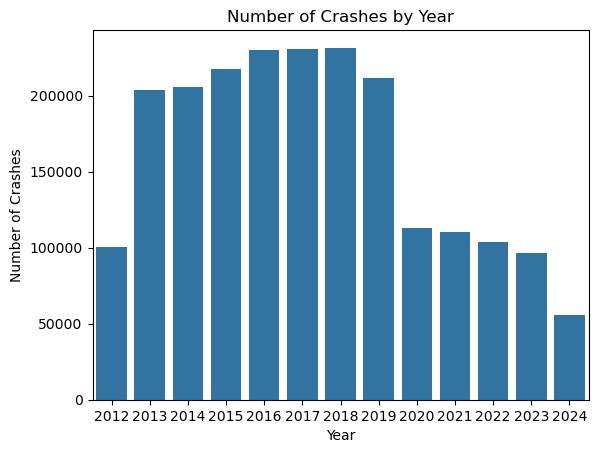

In [64]:
# Create a bar graph using seaborn
sns.barplot(x='Year', y='COLLISION_ID', data= yearly_pvt)

plt.title('Number of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')

In [317]:
# Select bike, scooter, cycle, moped from the vehicle type

keywords = ['bik', 'scoo', 'cyc', 'mop']

vehicle_types = ['VEHICLE TYPE CODE 1', 
             'VEHICLE TYPE CODE 2', 
             'VEHICLE TYPE CODE 3', 
             'VEHICLE TYPE CODE 4', 
             'VEHICLE TYPE CODE 5']

sub_df['2_Wheel'] = sub_df[vehicle_types].apply(lambda row: 'Yes' if any(any(keyword in str(value).replace(' ','').lower() for keyword in keywords) for value in row) else 'No', axis=1)




/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_24568/3733667988.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['2_Wheel'] = sub_df[vehicle_types].apply(lambda row: 'Yes' if any(any(keyword in str(value).replace(' ','').lower() for keyword in keywords) for value in row) else 'No', axis=1)


In [339]:
keywords = ['bik', 'scoo', 'cyc', 'mop']

# Concatenate all vehicle type columns into a single Series
all_vehicle_types = pd.concat(
    [sub_df[col] for col in ['VEHICLE TYPE CODE 1', 
                              'VEHICLE TYPE CODE 2', 
                              'VEHICLE TYPE CODE 3', 
                              'VEHICLE TYPE CODE 4', 
                              'VEHICLE TYPE CODE 5']], 
    ignore_index=True
)


# Define a function to check for keywords, handling non-string values
def contains_keyword(value, keywords):
    if pd.isna(value):
        return False
    value_str = str(value).replace(' ', '').lower()
    return any(keyword in value_str for keyword in keywords)

# List all unique vehicle types containing the keywords
matching_words = all_vehicle_types[all_vehicle_types.apply(lambda x: contains_keyword(x, keywords))].nunique()

# Print the matching words
print("Matching Words:", matching_words)


Matching Words: 156


In [105]:
# Check the percentage of 2-wheel accidents vs the rest
counts = sub_df['2_Wheel'].value_counts()
two_wheel_per = counts / counts.sum() * 100
print(counts)
print(two_wheel_per)

2_Wheel
No     1993946
Yes     117563
Name: count, dtype: int64
2_Wheel
No     94.432276
Yes     5.567724
Name: count, dtype: float64


In [175]:
# Create pivot table comparing 2Wheel vs 4Wheel Accidents
two_wheel_accident = pd.pivot_table(sub_df, values='COLLISION_ID', index='Year', columns='2_Wheel', aggfunc='count')
two_wheel_accident = two_wheel_accident.reset_index()
two_wheel_accident

2_Wheel,Year,No,Yes
0,2012,96450,4095
1,2013,196250,7492
2,2014,198749,7289
3,2015,209881,7813
4,2016,220681,9150
5,2017,222037,8970
6,2018,222788,8776
7,2019,202586,8900
8,2020,103520,9396
9,2021,98590,11963


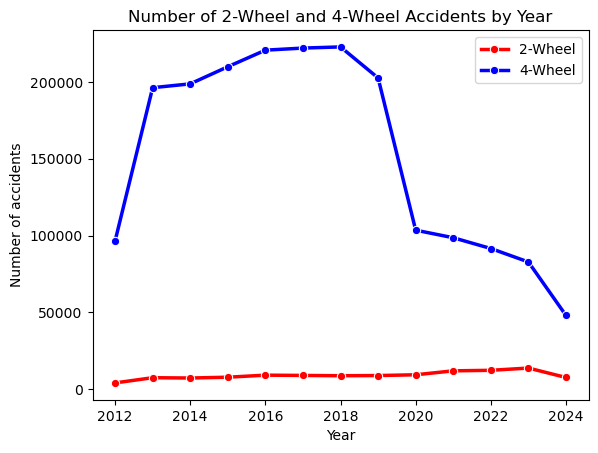

In [211]:
sns.lineplot(data=two_wheel_accident, x='Year', y='Yes', marker='o', label='2-Wheel', color='r', linewidth=2.5)
sns.lineplot(data=two_wheel_accident, x='Year', y='No', marker='o', label='4-Wheel', color='b', linewidth=2.5)

plt.title('Number of 2-Wheel and 4-Wheel Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of accidents')

plt.savefig('2w_vs_4w.png', dpi=300)
plt.show()



In [179]:
# Normalize data to compare
two_wheel_accident['No_normalized'] = (two_wheel_accident['No'] - two_wheel_accident['No'].min()) / (two_wheel_accident['No'].max() - two_wheel_accident['No'].min())
two_wheel_accident['Yes_normalized'] = (two_wheel_accident['Yes'] - two_wheel_accident['Yes'].min()) / (two_wheel_accident['Yes'].max() - two_wheel_accident['Yes'].min())
print(two_wheel_accident)

2_Wheel  Year      No    Yes  No_normalized  Yes_normalized
0        2012   96450   4095       0.277139        0.000000
1        2013  196250   7492       0.848159        0.350894
2        2014  198749   7289       0.862457        0.329925
3        2015  209881   7813       0.926151        0.384051
4        2016  220681   9150       0.987945        0.522157
5        2017  222037   8970       0.995703        0.503564
6        2018  222788   8776       1.000000        0.483524
7        2019  202586   8900       0.884411        0.496333
8        2020  103520   9396       0.317591        0.547567
9        2021   98590  11963       0.289383        0.812726
10       2022   91584  12302       0.249298        0.847743
11       2023   82817  13776       0.199136        1.000000
12       2024   48013   7641       0.000000        0.366284


In [181]:
two_wheel_accident_filtered = two_wheel_accident[two_wheel_accident['Year'] < 2024]

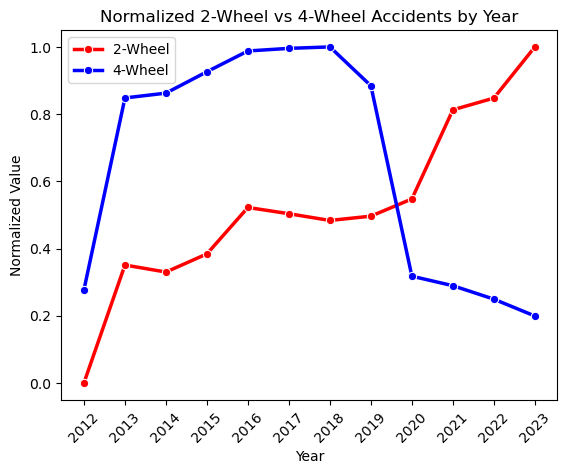

In [218]:


sns.lineplot(data=two_wheel_accident_filtered, x='Year', y='Yes_normalized', marker='o', label='2-Wheel', color='r', linewidth=2.5)
sns.lineplot(data=two_wheel_accident_filtered, x='Year', y='No_normalized', marker='o', label='4-Wheel', color='b', linewidth=2.5)

plt.title('Normalized 2-Wheel vs 4-Wheel Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.xticks(ticks=two_wheel_accident_filtered['Year'], rotation=45)


plt.savefig('2w_vs_4w_normalized.png', dpi=300)
plt.show()

In [268]:
# Create pivot by borough
yes_data = sub_df[sub_df['2_Wheel'].str.lower() == 'yes']
two_wheel_borough = pd.pivot_table(yes_data, values='COLLISION_ID', index='Year', columns='BOROUGH', aggfunc='count', fill_value=0)
two_wheel_borough = two_wheel_borough.reset_index()
two_wheel_borough_2023 = two_wheel_borough[two_wheel_borough['Year'] < 2024]

melted_df = two_wheel_borough_2023.melt(id_vars='Year', var_name='BOROUGH', value_name='Count')

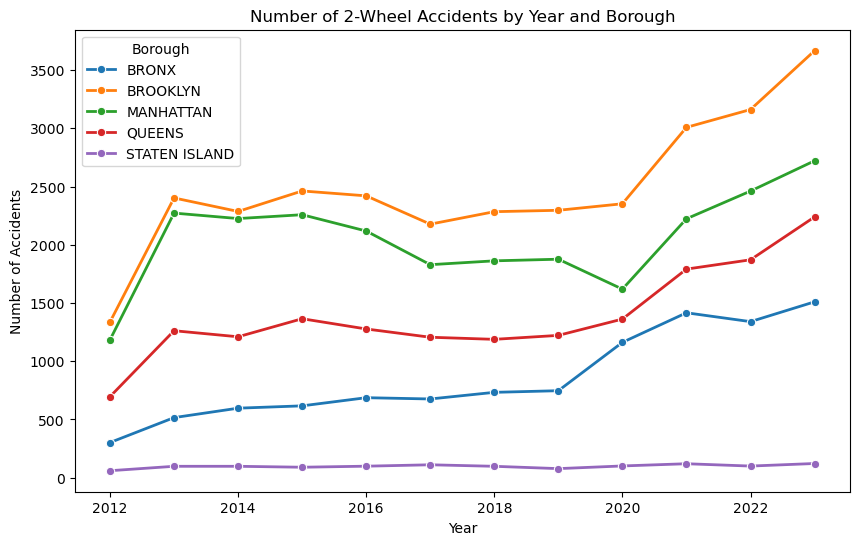

In [300]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='Year', y='Count', hue='BOROUGH', marker='o', linewidth=2, palette="tab10")

plt.title('Number of 2-Wheel Accidents by Year and Borough')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

plt.legend(title='Borough')
plt.savefig('2w_by_borough.png', dpi=300)
plt.show()